In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [59]:
print("Backend Used : {} , Keras Version : {}".format(keras.backend.backend(), keras.__version__))

Backend Used : tensorflow , Keras Version : 2.2.4


Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [60]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Returns 2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [61]:
# get shape of x_train and x_test
print("shape of X_train : {} and shape of y_train: {}".format(X_train.shape, y_train.shape))

shape of X_train : (60000, 28, 28) and shape of y_train: (60000,)


X_train is 2D array and y_train is 1D array.

In [62]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [63]:
y_train[1]

0

In [64]:
def displayDigits(digitLocation,para):
    if para == 'train':
        print(y_train[digitLocation])
        plt.matshow(X_train[digitLocation])
    else:
        print(y_test[digitLocation])
        plt.matshow(X_test[digitLocation])

2
4
0


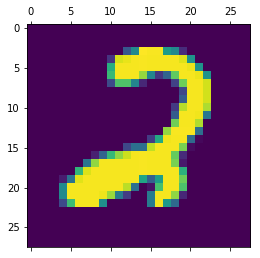

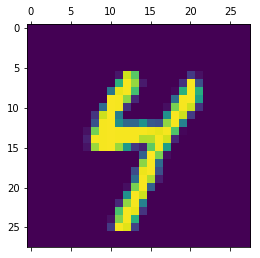

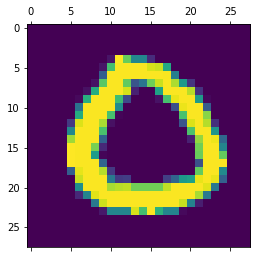

In [65]:
# let show few random image of digits
import random
for i in np.arange(0,3):
    displayDigits(random.randrange(0,6000),'train')

In [66]:
# The final preprocessing step for the input data is to normalize our data values to the range [0, 1].
X_train = X_train/255
X_test = X_test/255

In [67]:
# lets verify this normalization
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Keras Sequential model

In [68]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [69]:
model = Sequential()
# Pass an input_shape argument to the first layer
# this converts our 2D feature maps to 1D feature vectors

model.add(Flatten(input_shape=[28, 28]))
# 100 2D Hidden layers, such as Dense
# In a neural network, the activation function is responsible for transforming 
# the summed weighted input from the node into the activation of the node or output for that input.
# The function returns 0 if it receives any negative input, but for any positive value x
# it returns that value back. So it can be written as f(x)=max(0,x)
model.add(Dense(100, activation="relu"))

# 10 output label
#  Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes
model.add(Dense(10, activation="softmax"))

In [70]:
# get summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Our targets is  integer targets
# A loss function (or objective function, or optimization score function) is one of the three parameters required to compile a model:
# adaptive moment estimation
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [72]:
model.fit(X_train, y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 135us/step - loss: 0.2647 - acc: 0.9263
Epoch 2/3
60000/60000 [==============================] - 8s 125us/step - loss: 0.1189 - acc: 0.9651
Epoch 3/3
60000/60000 [==============================] - 7s 124us/step - loss: 0.0831 - acc: 0.9752


In [73]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 75us/step


[0.10165178960319608, 0.969]

Accuracy =  0.969 and Loss = 0.1016

In [74]:
predicted_y = model.predict(X_test)

In [75]:
# each predicted_y list element contain probalities of all 10 labels but max prob is the output
predicted_y[6]

array([1.4917225e-07, 2.6061064e-06, 6.5429963e-06, 5.5717501e-05,
       9.9164307e-01, 3.1199175e-05, 3.5792330e-06, 2.7425378e-04,
       2.8854178e-03, 5.0975210e-03], dtype=float32)

In [76]:
# Get the max prob
np.argmax(predicted_y[6])

4

4


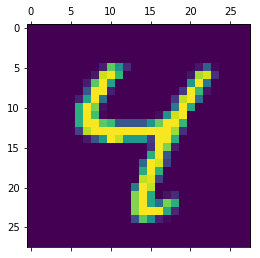

In [77]:
# get the label name and image
displayDigits(6,'test')